In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from results_plot import plot_results_for_dir, \
    plot_result, plot_trials, get_values, get_values_for_file_list
from collections import defaultdict
import os
from lr_tuning import get_file_list, \
    get_file_dicts, \
    get_relevant_metrics, \
    get_aggregated_values, get_mean_stddev, get_csvs

In [7]:
df = pd.read_csv("ADP post - Sheet2.csv", header=0)
df.head()

,Learning Rates,MHIST_transformed,GlaS_transformed,AJ-Lymph_transformed,BACH_transformed,PCam_transformed,OSDataset_transformed,CRC_transformed,BCSS_transformed,ADP_transformed
0,0.00005,0.794610,0.941667,0.885965,0.910481,0.761803,0.898025,0.840231,0.972151,0.945928
1,0.00010,0.814739,0.933333,0.921052,0.909647,0.751398,0.904071,0.857365,0.968234,0.946048
2,0.00020,0.809280,0.925000,0.929824,0.892966,0.772240,0.898831,0.873943,0.965995,0.944521
3,0.00050,0.852951,0.916667,0.877193,0.871004,0.780511,0.891374,0.901647,0.959429,0.940526
4,0.00100,0.836233,0.941667,0.859649,0.846817,0.794784,0.884724,0.896195,0.956519,0.939617


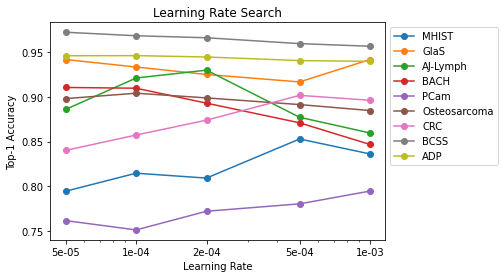

In [28]:
for dataset in df.columns:
    if dataset == "Learning Rates":
        continue
    plt.plot(df.loc[:, "Learning Rates"], df.loc[:, dataset], "o-", label=dataset.replace("_transformed", "").replace("OSDataset", "Osteosarcoma"))

plt.title("Learning Rate Search")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.ylabel("Top-1 Accuracy")
plt.xlabel("Learning Rate")
plt.xscale('log')
plt.xticks(df.loc[:, "Learning Rates"], [f"{float(num):.0e}" for num in df.loc[:, "Learning Rates"]])
plt.savefig("Learning Rate Search.png", bbox_inches='tight')